## **Structured programming (control flow)** 
With structured programming a programmer uses no more than three basic control structures to control the flow of the programming. Large blocks of code are avoided by the use of these abstractions in conjunction with a hierarchy in procedures. This might sound a bit opaque, but it is the way we all program. No matter if we program in Python, C or Haskell. We use only three basic control structures:

 1. sequencing: statements are executed in a specific order. In Python achieved by indentation and by a semicolon ; (The latter is not much used)
 2. selection: choice if B then S1 else S2 
 3. repetition through iteration: where you have the condition check in advance or afterwards (while B do S) and (do S until B) and/or repetition through recursion: repeated calling of a procedure until some base case is met.
 
Here B is a Boolean and S is a statement (a single executable instruction)

I will touch upon al these subjects, and quite a bit more. For instance, closures, context managers and the `else` keyword. Some of these subjects I want to investigate in depth, some pass over quite quickly as they are not well suited to Python e.g., recursion.


#### **Sequencing & Scope**
There is quite a bit to say about sequencing actually, and especially about scope. But I feel you know most of this so I will keep it quite terse. I am presuming that you know choice but let's do a quick recap, then look at match/case for choice introduced with Python 3.10, and finally take a look at pattern matching in Python.

Let me start off with definition for scope: The scope of a declaration is the part of a program where the bindings produced by the declaration are available.

Just think of bindings as variables, they are not the same but that is a topic of another notebook.

In [1]:
def a():
    x = 3
    return x 

def b():
    x = 4 
    return x 

In [2]:
a()

3

In [3]:
b()

4

We have two variables named x; the scope of these variables is the function that encompasses it.

The scope of a name binding (an association of a name to an entity, such as a variable) is the part of a program where the name binding is valid; that is, where the name can be used to refer to the entity e.g., I can never get 4 if I call `a()`.

In [2]:
x = 7 

def a(arg:int):
    x = 3
    return x 

def b():
    x = 4 
    return x 

In [3]:
a(x)

3

#### **Inner scope has preference**
The x declared outside the scope of `a()` and `b()` is never used, the inner scope is preferred to the outer scope. 

Only if I call it outside the scope respectively `a()` and `b()` can I use it.



In [4]:
print(x)

7


#### **Dynamic vs static scoping**
There are two forms of scoping dynamic and static. If we would look at the code below, in a dynamic scoped language `s` would have changed and the outcome `q(4)` would be 12.

Python is a static scoped language. Static scoping is more efficient than dynamic scoping and allows for information hiding https://en.wikipedia.org/wiki/Information_hiding.

In [5]:
s = 2

def f(x:int)->int:
    return s * x 

def p(y:int)-> None:
    print(f(y))
    
def q(z:int) -> None:
    s = 3
    print(f(z)) 
    
p(4);q(4)


8
8


#### **Scoping and namespace**
Scoping and namespace are related subjects. A namespace is a mapping of names to objects, in Python these namespaces take form of a dictionary. 
There are multiple namespaces in Python, the global namespace, containing for instance all built-in functions of Python. A modular namespace, containing all methods (and perhaps attributes) of that module. An objects namespace, which I will show you below.

The important thing to know about namespaces is that there is absolutely no relation between names in different namespaces. We can thus comfortably have the same names, as long as they belong to different namespaces. A.name and B.name. This is also the reason you really have no need for awfully long names, namespaces will rarely get big enough to have conflicting names. 

The namespace of an object is the scope of all that is named in the class.

In [6]:
class A: 
    s = 2

    def f(self, x:int)->int:
        return self.s * x 

    def p(self, y:int)-> None:
        print(self.f(y))
    
    def q(self, z:int) -> None:
        self.s = 3
        print(f'{type(self).__name__}`s s variable is {self.s}')
        print(self.f(z)) 

We can call on the built-in function `dir` to get the names in scope of the object. Or the local scope if we do not give an argument.

Calling dir will probably give you more information than you wanted, as you inherit many methods from `Builtins.object`.

In [16]:
dir(A)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'f',
 'p',
 'q',
 's']

In [17]:
a = A()
a.p(4);a.q(4) # this is sequencing

8
A`s s variable is 3
12


#### **Closure**
If I were discussing another programming language for instance Java, I would not discuss closures for closures are not important in Java. In Python however closures are used quite often. To expand the scope of a function or class. 

So, what is a closure? By definition, a closure is a nested function that references one or more variables from its enclosing scope. This definition probably makes more sense with an example.


In [18]:
def say():
    greeting = 'Hello'

    def display():
        print(greeting)

    return display()    

In [19]:
say()

Hello


Here `display` is the closure, it is nested within `say`, it uses greeting that is part of `say()` which is also the enclose scope. 

With the use of closures, it is possible to give a sub-procedure one or more private variables that remain in existence between procedure calls. You actually see closures quite often in Python as you use a lot of decorators in Python. Decorators can be used in Python as higher-order functions and the decorated function has access to the decorator, the decorated function contains the closure. 

Of course, now we want to know what a higher-order function is. In mathematics and computer science, a higher-order function is a function that does at least one of the following:
 1. It takes one or more functions as arguments.
 2. It returns a function as its result.

As we know from mathematics, function composition is an example of a higher-order function $f \circ g$  or $g(f(x))$ 

A curried function is a function that returns a function. In mathematics and computer science, currying is the technique of translating the evaluation of a function that takes multiple arguments into evaluating a sequence of functions, each with a single argument. $f(x,y)=h \rightarrow f(x)=g, g(y)=h$. Don't worry Python doesn't do currying, but it does do pattern matching which is sort of related and will be discussed in this notebook.

Let's look at a function decorator.

In [24]:
def decorator(func):
    
    def wrapper_decorator(*args, **kwargs):
        # Do something before
        func(*args, **kwargs) # This the fst time
        func(*args, **kwargs) # This is the snd time
        # Do something after
        return func(*args, **kwargs) #This is the third time 
    return wrapper_decorator

@decorator
def george(name):
    '''This is George his function'''
    print('George is a rhino!')
    return f"hi {name}!"

george('George')

George is a rhino!
George is a rhino!
George is a rhino!


'hi George!'

This simple decorator does only one thing, it executes the print statement three times, after which the function returns the argument.

There is simple boiler plate that allows you to write any decorator you want:

In [25]:
import functools

def decorator(func):
    '''boiler plate for any decorator'''
    @functools.wraps(func) # you will need this line to inspect a decorator
    def wrapper_decorator(*args, **kwargs): # the convention is to call these functions wrapper_name_function 
       # do something
        return func(*args, **kwargs)
    return wrapper_decorator 

You need functools otherwise you can't distinct between the functions, you can't inspect them nor use help.

In [26]:
george

<function __main__.decorator.<locals>.wrapper_decorator(*args, **kwargs)>

In [27]:
help(george)

Help on function wrapper_decorator in module __main__:

wrapper_decorator(*args, **kwargs)



This is not information about George it is about the wrapper function that wraps George.

In [28]:
def decorator(func):
    @functools.wraps(func)
    def wrapper_decorator(*args, **kwargs):
        # Do something before
        func(*args, **kwargs) # This the fst time
        func(*args, **kwargs) # This is the snd time
        # Do something after
        return func(*args, **kwargs) #This is the third time 
    return wrapper_decorator

@decorator
def george(name):
    '''This is George's his function'''
    print('George is a rhino!')
    return f"hi {name}!"

In [29]:
george

<function __main__.george(name)>

In [30]:
help(george)

Help on function george in module __main__:

george(name)
    This is George's his function



The primary use of decorators is to enrich functions with outside behaviour, consider the code below.

In [31]:
ok = 10 
waisting_time = 40
are_you_crazy = 1000

def fibonacci(n:int)->int:
    '''this fibonacci method returns the n-th fibonacci number'''
    return 1 if n < 2 else fibonacci(n-1) + fibonacci(n-2)    

fibonacci(ok)

89

This code works, but is not very efficient, as you can see below.

In [35]:
%time fibonacci(waisting_time)

CPU times: total: 38.5 s
Wall time: 38.5 s


165580141

#### **dynamic programming**
The inefficiency is in that we don't store intermediate results. After all we have already computed the eight Fibonacci number (34 in 34 + 55  = 89) so why compute it gain, it is much faster to look it up.

With the `@functools.cache` decorator we enrich this function to store intermediate results. Caching intermediate results is an example of dynamic programming and in particular a technique called memoization. This is an advanced programming technique which I won't discuss in this notebook, but in a separate notebook on efficiency. 

In [36]:
@functools.cache
def fibonacci(n:int)->int:
    '''this fibonacci method returns the n-th fibonacci number'''
    return 1 if n < 2 else fibonacci(n-1) + fibonacci(n-2) 
%time fibonacci(are_you_crazy)

CPU times: total: 0 ns
Wall time: 6.51 ms


70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501

As you can see computed the 1000th Fibonacci number in less than a nano second using the decorator.

You can even use multiple decorators, but you have to think about the order is it $f \circ g \circ h$ or is it $f \circ h \circ g$. 

Function composition is an important subject you should master it. Say you have a large file of numbers (as data scientist you will) and you only want a selection of it. With function composition you can do this on the fly. Let’s say you want all multiples of 3 and 5 bigger than 300 smaller than 500 in a list of a thousand entries. The following single line of code will do.

In [37]:
tuple(filter(lambda x: 300 < x < 500, filter(lambda x: x % 3 == 0 and x % 5 == 0 , tuple(n for n in range(1,1001)))))

(315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495)

#### **Selection**
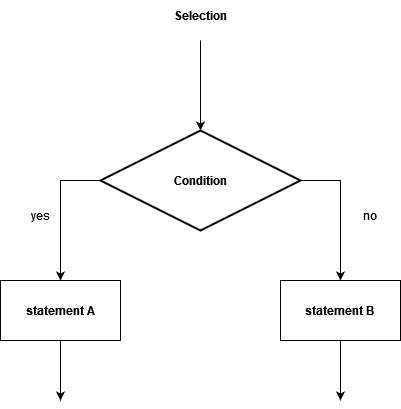

The pattern of selection is grasped by the above diagram. All selection patterns are based on this model. You can have a nested `if ... then ... else ...`  and make as complicated a pattern as you want, but the base is always the same.

In [38]:
def choice(b:bool)->str:
    return 'statement A' if b else 'statement B'
choice(True) 

'statement A'

In [39]:
choice(False)

'statement B'

#### **Conditional expression**
I cheat a little bit here because what I use is a conditional expression. A conditional expression consists of a condition `if b` in our case and two or more subexpression. The conditions value (in our case true or false), will determine which subexpressions is chosen. 

Conditional expressions have been around in in Python ever since PEP308 (2003) yet mostly you see conditional statements, as they are simply clearer to most.

In [40]:
def choice(b:bool)->str:
    if b:
        return 'statement A'
    else:
        return 'statement B'
choice(True) 

'statement A'

#### **Structural pattern matching**
As of Python 3.10 you don't have to make a choice with nested `if ... then ... else ...` statements anymore. You can use structural pattern matching, see https://peps.python.org/pep-0635/.

Pattern matching is a technique used by most functional programming language probably ever since their conception. For instance, say I want to write a function that returns the first element of a tuple in Haskell I could define it as: 
 `fst :: (a,b) -> a`
 `fst (x,_) = x` 

The realisation is that I really don't need the second element, the pattern of `fst` is that always the first element. I can do very much the same in Python.


In [41]:
from typing import Any

def fst(t:tuple)->Any:
    a,_ = t
    return a 

In [42]:
tup = ('x','y')
fst(tup)

'x'

The complement pattern is of course second.

In [43]:
def snd(t:tuple)->Any:
    _,b = t
    return b

In [22]:
snd(tup)

'y'

Consider the code below a common nested if... then... else... you will quite often see in Python code.

In [45]:
def nested(arg):
    if arg == 'George':
        return 'George is a rhino'
    elif arg == 'Croc':
        return 'Croc is peckish!'
    elif arg == 'Rhino':
        return 'I like to run around while snorting loudly'
    elif arg == 'Ente':
        return 'Ich brauch ein Taxi'
    else:
        return 'there is nothing else'
        

In [46]:
nested('George')

'George is a rhino'

In [47]:
nested('James Bond')

'there is nothing else'

A match/case pattern captures they underlying the structure much clearer.

In [48]:
def match(arg):
    match arg:
        case 'George':
            return 'George is a rhino'
        case 'Croc':
            return 'Croc is peckish!'
        case 'Rhino':
            return 'I like to run around while snorting loudly'
        case 'Ente':
            return 'ich brauch ein Taxi'
        case _:
            return 'there is nothing else'

In [49]:
match('Rhino')

'I like to run around while snorting loudly'

In [50]:
match('Croc')

'Croc is peckish!'

The underscore `_` is a wildcard here, it says I don't care about this value to the compiler. 
I could have used the keyword `other` too, but we are actually pattern-matching on a structure, we are matching a string literal.

This type of structural pattern matching is the next big thing in Python see https://peps.python.org/pep-0636/. You should read this excellent tutorial because pattern matching cleans up your code. 

Here I will limit this to a few subjects that I feel show you to advantages of structural pattern matching. As you have seen and for the rest probably guessed you have several patterns you can match on:
 1. Capture patterns (stand-alone names like direction, action, objects). We never discussed these separately but used them as part of other patterns.
 2. Literal patterns (string literals, number literals, True, False, and None)
 3. The wildcard pattern 

You can also pattern match on sequences for instance, you want the head of a list.

In [51]:
from typing import Any

def head(l:list)->Any:[x,*xs] = l; return x 

In [52]:
l = [n for n in range(1,11)]
head(l)

1

The antonym of head is the tails function easily written with pattern matching on a sequence.

In [53]:
def tails(l:list)->Any:
    [x,*xs] = l
    return xs

In [32]:
tails(l)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

As you've guessed you can expand this quite easily.

In [54]:
def fst3(l:list)->list:
    [x,y,z,*xs] = l
    return [x,y,z]

In [55]:
fst3(l)

[1, 2, 3]

We can caputure richer patterns, for instance forking with a logical or `|`.

In [56]:
def crocs_snackies(arg:str)->str:
    match arg:
        case 'Blue Heron' | 'Wallaby' | 'Cote du boeuf':
            return 'Delicious snacky'
        case 'Tuna' | 'Salmon' | 'Dolphin':
            return 'OK I will eat this but honestly this is Gator food'
        case _:
            return 'Are you trying to poison me with a veggie?'
    

In [57]:
crocs_snackies('Wallaby')

'Delicious snacky'

In [58]:
crocs_snackies('Dolphin')

'OK I will eat this but honestly this is Gator food'

In [59]:
crocs_snackies('carrot')

'Are you trying to poison me with a veggie?'

For more on pattern matching I do advise you to check the tutorial. 

I just want to show you a last one and maybe you will realize that you can do much more with patterns in Python than just a match/case. I personally like to use it to write clear and concise functions.

In [60]:
def swap(t:tuple)->tuple:
    x,y = t
    return y,x

In [61]:
t =('a','b')
swap(t)

('b', 'a')

#### **Iteration**
Iteration is the main subject of this notebook, I will show you what iteration means in detail, what a generator is in Python, how you can create your own iterators and let Python do it for you. We even take a look at laziness, when using laziness, we can even have an infinite number of repetitions. Finally, we look at the functional programming tools in the itertools & functools module that allow you to use iteration concepts as building blocks to build increasingly more powerful algorithms.

Iteration is the technique marking out of a block of statements within a computer program for a defined number of repetitions. 

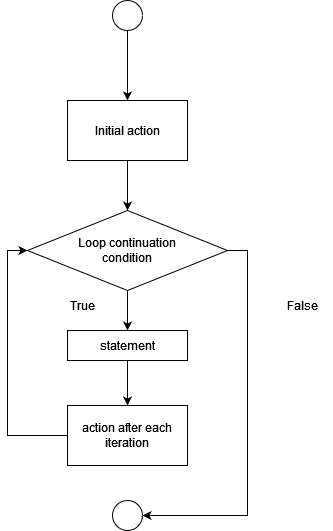

What we see is in fact a loop. We do something while a condition is true.

In [62]:
x = 1 

while x < 6:
    print(x)
    x += 1

1
2
3
4
5


The for-loop with index that we know in Python, follows the same pattern. 
It is syntactic sugar for the while loop, logically they are the same.

In [43]:
for n in range(1,6):
    print(n)

1
2
3
4
5


In Python the for-each-loop is more used than the for-loop with index. The for-each-loop traverses items in a collection.

In [63]:
l = [1,'a',True,4,5]

for item in l:
    print(item)

1
a
True
4
5


My presumption is, that this all familiar to you. Like I presume that you have seen generators before.

In [65]:
t = tuple(n for n in range(1,21) if n % 2 == 0)
t

(2, 4, 6, 8, 10, 12, 14, 16, 18, 20)

#### **Iteration topics**
The topics I want to discuss concerning iteration are:
 1. How you make your classes iterable.
 2. What is the difference between an iterable and iterator.
 3. What is a generator, and how is that different from an iterator.
 4. What is laziness.
 5. The itertools module.

#### **Making your classes iterable**
Consider the code below:

In [66]:
import re #https://docs.python.org/3/library/re.html
import reprlib 
from dataclasses import dataclass, field


@dataclass
class Sentence:
    '''an iterable class'''
    text:str 
    words:list[str]=field(default_factory=list)

    def __post_init__(self)->None:
        RE_WORD = re.compile(r'\w+')
        self.words = RE_WORD.findall(self.text) 

    def __getitem__(self, index:int)->str:
        return self.words[index]
    
    def __len__(self)->int:
        return len(self.words)
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 

The class Sentence is made, it has two attributes the text that is the whole sentence and words, the words that make up the sentence.

We create a few methods. Which are all special methods, by now you should have realized the importance of special methods. The `__repr__` uses a method from the reprlib library to shorten the length of the sentences

In [67]:
s = Sentence('"George is a rhino", Croc said')
s

Sentence('"George is a...o", Croc said')

In [68]:
s.words

['George', 'is', 'a', 'rhino', 'Croc', 'said']

In [69]:
s.text

'"George is a rhino", Croc said'

In [70]:
for word in s: print(word)

George
is
a
rhino
Croc
said


#### **Sequence interface**
How did I make this class iterable? Simple by implementing `__getitem__()` I have implicitly implemented sequence interface. The sequence interface is a subclass of the iterable interface. Python allows you to do this form of interface implementation, it is called extreme DuckTyping; by implementing a single method of sequence I have implemented the interface.  A Sequence in Python is always iterable, for all sequence types have implemented `__iter__` and `__getitem__`

I can build upon this iterability and use other functionality. For instance, I can filter.


In [74]:
[word for word in s if len(word) <3]

['is', 'a']

or I can slice.

In [52]:
s[4]

'Croc'

#### Or I can just list them all

In [75]:
tuple(s)

('George', 'is', 'a', 'rhino', 'Croc', 'said')

#### **The iter function**
Whenever Python needs to iterate over an object it calls the `iter` function. This built-in function checks whether: 
 1. The object implements `__iter__`, if so, it calls that to obtain an iterator.
 2. if `__iter__` is not implemented it checks for `__getitem__`. If this is the case `iter()` returns an iterator that fetches items by index starting from 0. This is what we have done in the above code, which is enough to implement the Sequence interface.

If both fail, then Python raises a TypeError 'C' object is not iterable.

You can use iter() in combination with a callable (functions, methods, and classes are callable). Every next element in our sequence is now a call to the callable. In the example below I use a function that keeps throwing until 3 comes.


In [76]:
from random import randint
def die(): return randint(1,6)

You should run the cell below a few times just to see the difference.

In [80]:
die_iter = iter(die,3)
[roll for roll in die_iter] # this not a generator but list comprehension 

[6, 4, 4, 5, 5, 4, 5, 1, 2, 2]

As three is the sentinal value, this code will never show a three. https://en.wikipedia.org/wiki/Sentinel_value

#### **Iterator**
An iterator is a software design pattern (see the design patterns notebook), that abstracts the process of scanning through a sequence of elements one element at the time. All programming languages that implement iterators (not all do for instance Clojure does not) have two questions in common:
 1. How to know if there is a next element? For instance, you need to have some sort of `hasNext` function (like Java's util.iterator interface) that returns a Boolean or catch an error when there is no more next. Python uses an error to signal that there are no more items.
 2. How to go to the next element in a sequence a `next` function that returns the next element in the sequence. 

Pythons `iter` function returns an iterator object if `__iter__` is defined in the iterable, here a callable iterator.


In [82]:
die_iter

#### **Iterable**
Any object that is a sequence: a sequence is an enumerated collection of objects in which repetitions are allowed and order matters is a priori iterable. The very Python specific the definition of an iterable is: Any object from which the built-in `iter` function can obtain an iterator. 

We can show that a Python iterator object actually has `next()` implemented. 

In [83]:
t= 'ABC'
it = iter(t)# create the iterator

while True:
    try:
        print(next(it)) 
    except StopIteration: # iterator raises a StopIteration error when there are no more elements
        del it # keeping your memory usage tidy by getting rid off the iterator object <callable_iterator at 0x1cb3bf87a30> is a memory address
        break # exit the loop

A
B
C


This code is of course much easier written with a for loop. 

In [84]:
for char in t:
    print(char)

A
B
C


#### **Python's iterator model**

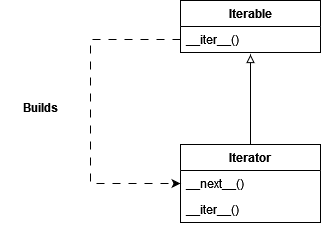

There are two things you should notice in this diagram.
 1. As we can see Python hasn't implemented a has_next() function instead it raises an error, It has implemented an `__iter__()` which allows iterators to be used where an iterable is expected. 
 2. The iterable builds the iterator. 

Let's investigate these points a bit more.

We can iterate over our sentence and will end up with an error.

In [85]:
it = iter(s)
next(it)

'George'

In [86]:
next(it)

'is'

In [87]:
next(it)

'a'

In [88]:
next(it)

'rhino'

In [89]:
next(it)

'Croc'

In [90]:
next(it)

'said'

In [65]:
next(it)

StopIteration: 

We can rewrite our Sentence class so that it is an iterable.

In [93]:
import re #https://docs.python.org/3/library/re.html
import reprlib 
from dataclasses import dataclass, field


@dataclass
class Sentence:
    text:str 
    words:list[str]=field(default_factory=list)

    def __post_init__(self):
        RE_WORD = re.compile(r'\w+')
        self.words = RE_WORD.findall(self.text) 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        return SentenceIterator(self.words)
    
@dataclass
class SentenceIterator:
    words:list[str]=field(default_factory=list)
    index:int=0
    
    def __next__(self)->str:
        try:
            word = self.words[self.index]
            self.index +=1
        except IndexError:
            raise StopIteration()
        return word
    
    def __iter__(self): # returning self allows SentenceIterator to be a subclass of an iterable 
        return self
    

In [94]:
s2 = Sentence('Croc is peckish as always')

In [95]:
it = iter(s2)
next(it)

'Croc'

In [96]:
next(it)

'is'

In [97]:
for word in s2:
    print(word)

Croc
is
peckish
as
always


However, having implemented an iterator and an iterable I can't slice. For I have not implemented `__getitem__`

The difference in the `__getitem__`  and `__iter__` is that the latter loops over a collection, and that the former loops over an index which it assumes starts with 0. I need an index to slice, to be subscriptable.

In [99]:
s2[3]

TypeError: 'Sentence' object is not subscriptable

Instead of throwing an error as Python does, we ccould create a `has_next` function.

In [100]:
import re #https://docs.python.org/3/library/re.html
import reprlib 
from dataclasses import dataclass, field


@dataclass
class Sentence:
    text:str 
    words:list[str]=field(default_factory=list)

    def __post_init__(self):
        RE_WORD = re.compile(r'\w+')
        self.words = RE_WORD.findall(self.text) 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        return SentenceIteratorTwo(self.words)

@dataclass
class SentenceIteratorTwo:
    words:list[str]=field(default_factory=list)
    index:int=0
    
    def __next__(self)->str:
        if self.has_next():
            word = self.words[self.index]
            self.index += 1
            return word
        else:
            return 'There is no next item'
            
    def has_next(self)->bool:
        return self.index < len(self.words)            
    
    def __iter__(self):
        return self

In [101]:
s3 = Sentence('short sentence')
it = iter(s3)

In [102]:
next(it)

'short'

In [103]:
next(it)

'sentence'

In [104]:
next(it)

'There is no next item'

#### **don't confuse iterables and iterators!**
An iterable builds an iterator but never implements the iterator interface itself. If you did you could only traverse that iterable once. You should consider this point carefully it is quite important you might not understand why your code is not working properly. 

The goal is of course to allow multiple traversals of the same object, so the same object can't be the iterator and the iterable.


#### **Generator**
A generator is a function that can control the iterating behaviour of a loop. Invented by Barbera Liskov, well know for her substitution principle.

In Python you can create a generator by simply using the keyword yield. (Again we are extreme duck typing here).

In [105]:
@dataclass
class Sentence:
    text:str 
    words:list[str]=field(default_factory=list)

    def __post_init__(self):
        RE_WORD = re.compile(r'\w+')
        self.words = RE_WORD.findall(self.text) 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        for word in self.words:
            yield word
    

As you can see the code just got a lot easier to read. We removed the whole iterator object.

The yield expression is used when defining a generator function and thus can only be used in the body of a function definition. Using a yield expression in a function’s body causes that function to be a generator function that returns a generator object. A generator object has a next function and a StopIteration error indeed it is an iterator.

This code generates a stream of words.

In [106]:
s4 = Sentence('Running around in circles naked while snorting loudly is every rhinos hobby')
it = iter(s4)
next(it)

'Running'

In [107]:
next(it)

'around'

Now you might think we have made our iterable an iterator, but we have not.

We used a generator to allow us to control the for loop in iter, there is not iterator object here. There is however a generator object.

In [108]:
s4.__iter__()

<generator object Sentence.__iter__ at 0x0000023A41B3C040>

To prove that our class is not an iterator let's iterate over it multiple times.

In [109]:
it2 = iter(s4)
next(it2)

'Running'

In [110]:
next(it)

'in'

In [111]:
next(it2)

'around'

In [112]:
it3 = iter(s4)
next(it3)

'Running'

In [113]:
next(it)

'circles'

To prove that our class is not an iterator let's iterate over it multiple times.
It is important to remember that a yield statement is different from a return statement:
 * A return statement leaves the current function call with an expression result list (you can have multiple return values in Python), or None, as the return value.
 * A yield statement yields elementwise the elements of a sequence, it doesn't return. 

The use of return in a generator function would immediately see the end of the loop, and control is handed over to the outer scope.


#### **Laziness**
Laziness depends on lazy evaluation, that is to only apply an operation when the result is need, not before. Haskell knows lazy evaluation and for instance knows the lzay list which is purely infinite. I could say `[1..]` and basically get any integer from that list.

Pythons evaluation strategy is eager, where an operation is applied as soon as the operands are known. We can still use laziness in Python as the `re` module uses Lazy evaluation. 

In [114]:
import re #https://docs.python.org/3/library/re.html
import reprlib 
from dataclasses import dataclass


@dataclass
class LazySentence:
    text:str 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        for match in re.compile(r'\w+').finditer(self.text):
            yield match.group()

In [115]:
s5 = LazySentence('Running around in circles naked while snorting loudly is every rhinos hobby')
it = iter(s5)
next(it)

'Running'

In [116]:
next(it)

'around'

The laziness is the fact that
`['Running','around','in','circles','naked','while','snorting','loudly','is','every','rhinos','hobby]` is only evaluated one element at the time, meaning that only one element is put in memory and then gets evaluated. 

If we have an endless stream of words we are trying to iterate over, now we can. We don't have to put the entire stream in memory or buffer parts of the stream first before evaluating it. 

Instead of using yield we could also simply return a generator object by using a generator expression which creates the object.

We could rewrite LazySentence using a generator expression as:

In [118]:
import re #https://docs.python.org/3/library/re.html
import reprlib 
from dataclasses import dataclass


@dataclass
class LazySentence:
    text:str 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        return (match.group() for match in re.compile(r'\w+').finditer(self.text))
        

In [119]:
s6 = LazySentence('Running around in circles naked while snorting loudly is every rhinos hobby')
it = iter(s6)
next(it)

'Running'

In [120]:
next(it)

'around'

In [121]:
s6

Sentence('Running arou... rhinos hobby')

#### **Declarative programming**
Using the internal strength of the Python we have managed to bring down our code to two methods, and still LazySentence can be iterated over. This is a good example of why declarative programming is often more concise and contains less faults than imperative. Declarative programming describes what needs to be computed and lets the compiler/interpreter take care of the how it is computed. The more general imperative style of Python programming would tell the interpreter how to compute something. Python I feel is moving ever more to declarative style of programming.

True, this code is not purely declarative, but you get the point.

#### **Generator vs Iterator**
What is the big difference between a generator and an iterator. You create an iterator by implementing a next function. 
#### 
    `def __next__(self)->str:
        if self.has_next():
            word = self.words[self.index]
            self.index += 1
            return word
        else:
            raise StopIteration()`
          
Where a generator is an iterator that is created by the compiler. You can tell the compiler in two different ways you want an iterator; you can use the yield keyword,

####
      `def __iter__(self):
         for word in self.words:
            yield word`
            
or you can use a generator expression.

####
      `def __iter__(self):
         return (match.group() for match in re.compile(r'\w+').finditer(self.text))`

In use a generator and an iterator are the same. You should always assume the interpreter knows better, you should have the compiler create the iterator (via a generator) instead of creating your own!


#### **itertools module**
To fully take advantage of generators Python borrowed from functional languages as SML and Haskell to create the itertools library. A core set of fast, memory efficient tools that are useful by themselves or in combination. Combining functions is the common way to build complex programs in functional languages. 

####
      `countFrom :: Num a => a -> a -> [a]
       countFrom n step = n : countFrom (n + step)

       from10to20 :: [Integer]
       from10to20 = takeWhile (<= 20) $ countFrom 10 1`

The first function creates a list of integers from some starting point `n`. The second function uses the first function to create a list from 10 to 20 while using the first function. We can do something similar in Python.

In [122]:
from dataclasses import dataclass

@dataclass(frozen=True)
class CountFrom:
    begin:object
    step:object
    end:object
    
    def __iter__(self)->object:
        result_type = type(self.begin + self.step) # the result type of our function, which is the broadest type
        result = result_type(self.begin) # this a cast to the correct result type 
        forever = self.end is None # the list wil either end or not if forever is true
        index = 0
        while forever or result < self.end:
            yield result
            index += 1
            result = self.begin + self.step * index

In [123]:
cf = CountFrom(0,1,5)
list(cf)

[0, 1, 2, 3, 4]

In [124]:
from decimal import Decimal

cf = CountFrom(0, Decimal('.1'), .3)
tuple(cf)

(Decimal('0'), Decimal('0.1'), Decimal('0.2'))

Now I can create a sort of similar from10to20 function in Python.

In [125]:
def from_ten_to_twenty(): 
    cf = CountFrom(10,1,21)
    return list(cf)

In [126]:
from_ten_to_twenty()


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

The above code is of course near to the same as the range function

In [102]:
list(range(10,21,1))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

There are some limitations to `range` we overcome with CountFrom for instance we can use many different types of objects.

CountFrom is more generic.

In [127]:
from fractions import Fraction

list(range(0, Fraction(1,3), 2))

TypeError: 'Fraction' object cannot be interpreted as an integer

In [128]:
cf = CountFrom(0, Fraction(1,3), 2)
list(cf)

[Fraction(0, 1),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(1, 1),
 Fraction(4, 3),
 Fraction(5, 3)]

Python's evaluation strategy is eager https://en.wikipedia.org/wiki/Evaluation_strategy#Eager_evaluation. 

Meaning you would have to produce the whole list before you evaluate it. This is a problem how can I create `from_ten_to_twenty` while using infinite list? Here Haskell uses takeWhile. Python's itertools provide you with basically Haskell's takeWhile function. (The itertools library is basically based on Haskell and SML)

In [129]:
import itertools

def from10to20()->list[object]:
    cf = CountFrom(10,1,None)
    return itertools.takewhile(lambda x: x <= 20, list(cf))

No we run in to trouble, the Python compiler refuses service if you call from `from10to20`, it's still making the infinite list. 
Luckily itertools safes us again with the count function that just keeps on counting from `n` to whatever.

In [130]:
def from10to20():
    return list(itertools.takewhile(lambda x: x <= 20, itertools.count(10)))
from10to20()

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

The itertools module is full with extremely handy functions that you can combine virtually endlessly to evermore complex algorithms.

For instance, you can easily chain iterables.

In [109]:
import itertools

list(itertools.chain('George ', 'is ', 'a ', 'rhino'))

['G',
 'e',
 'o',
 'r',
 'g',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'r',
 'h',
 'i',
 'n',
 'o']

#### This might not seem so handy but combined with accumulate it becomes more powerful I basically concatenated four strings

In [110]:
import operator

list(reversed(list(itertools.accumulate(list(itertools.chain('George ', 'is ', 'a ', 'rhino')), operator.add))))[0]

'George is a rhino'

#### of course these are lots of brackets :-)
#### I could just use functools reduce and be done with it so much easier

In [111]:
from functools import reduce
import operator

str(reduce(operator.add, itertools.chain('George ', 'is ', 'a ', 'rhino'),  ''))

'George is a rhino'

#### Of course I cheated a little bit by adding a blank space. 
#### However you could easily write an intersperse function that distributes ` ` over the word and use it to weave the blank space in. 
#### you should try this as an excercise.
#### Meanwhile I'll show you one more thing you can do with itertools and function composition
#### then you should investigate itertools yourself https://docs.python.org/3/library/itertools.html rembering these are fast and memory efficient tools. So yes you can achieve this in different manners in Python, but those won't be guaranteed fast and efficient. 

In [112]:
list(itertools.product([1,2,3,4,5], 'xy'))

[(1, 'x'),
 (1, 'y'),
 (2, 'x'),
 (2, 'y'),
 (3, 'x'),
 (3, 'y'),
 (4, 'x'),
 (4, 'y'),
 (5, 'x'),
 (5, 'y')]

## **Recursion**
#### Recursion is a method of solving a computational problem where the solution depends on solutions to smaller instances of the same problem. Recursion solves such recursive problems by using functions that call themselves from within their own code. 
#### Recursion is the twin of induction, induction being a mathematical technique to construct proofs. A statement P ( n ) P(n) is true for every natural number n n, that is, that the infinitely many cases $P ( 0 ) , P ( 1 ) , P ( 2 ) , P ( 3 ) , … $  all hold.
#### A proof by induction consists of two cases. The first, the base case, proves the statement for $n = 0$  without assuming any knowledge of other cases. The second case, the induction step, proves that if the statement holds for any given case $n = k$ then it must also hold for the next case $n = k + 1$
#### I started this notebook with a claim, that you only need three basis structures to acomplish all control flow in programming. This is actually proven by Bohm & Jacopini who wrote that proof using induction.
#### In computer programming a proof by structural induction is often used. https://en.wikipedia.org/wiki/Structural_induction
#### The same ideas we find in recursion, you define a base case or more base cases, and make a recursive call until you hit the base case after which you compute the result on the call stack.
#### a clear example is needed before I explain more

In [113]:
def factorial(n):
    if n == 1: #base case
        return 1
    return n * factorial(n-1)

In [114]:
factorial(5)

120

#### An example with two base cases

In [115]:
def fibonacci(n:int)->int:
    if n == 0: #  base case
        return 1
    elif n == 1:
        return 1
    else:     # recursive call
        return fibonacci(n-1)+fibonacci(n-2)

In [116]:
fibonacci(10)

89

#### what happens with factorial is it puts the intermediate function calls on the call stack https://en.wikipedia.org/wiki/Call_stack
#### It looks something like this:
#### stack `[factorial 5]` <- first call
#### stack `[factorial(5) * (factorial(4)*factorial(3)]`
#### stack `[factorial(5) * (factorial(4)*(factorial(3)*factorial(2))]`
#### stack `[factorial(5) * (factorial(4)*(factorial(3)*(factorial(2)*factorial(1)))]`
#### stack `[factorial(5) * (factorial(4)*(factorial(3)*(factorial(2)*1)))]`
#### stack `[factorial(5) * (factorial(4)*(factorial(3)*(2*1)))]`
#### stack `[factorial(5) * (factorial(4)*(3*(2*1)))]`
#### stack `[factorial(5)*(4*(3*(2*1)))]`
#### stack `[5*4*3*2*1]`
#### ...
#### stack `[120]`
#### As you can see the stack gets build up with all the function calls then with the intermediate results and finally the result

#### There are languages like Clojure and Haskell that don't have any looping mechanism. 
#### They solely rely on recursion for the process of scanning elementwise through a sequence of elements.
#### However in Python you shouldn't use bare recursion, for Python recursion is not optimized

In [135]:
fibonacci(40) # this take a while be patient

165580141

#### In fact standard recursion in Python is a very inefficient way of programming for C has no optimization of recursion in C is one of the two languages the CPython compiler is written in. 
#### Python has a recursion depth of 3000, meaning your call stack can't grow beyond that. (It used to be less than a thousand) 

In [117]:
def product(ns:list[int], acc)->int:
    if len(ns)==0:
        return acc
    else:
        acc = ns.pop(0)*acc
        return product(ns,acc)

In [118]:
product([1,2,3,4,5], 1)

120

In [119]:
longlist = [n for n in range(1,100000)]
product(longlist,1)

RecursionError: maximum recursion depth exceeded

In [120]:
import sys
sys.getrecursionlimit()

3000

#### Of course Haskell and Clojure have optimized recursion, you could see from my above explanation of what happend at the call stack that you can easiliy optimize this process.
#### Python doesn't and it will never dixit Guido van Rossum. He feels leaving some stack traces while eliminating others, leads to confussion while debugging.
#### Honestly I agree Python being an imperative language (we change state) it is better to use iteration. 
#### Python has some optimization in external tools. Mainly in caching intermediate results 

In [121]:
from functools import cache

@cache
def fibonacci(n:int)->int:
    return 1 if n < 2 else fibonacci(n-1)+fibonacci(n-2)


In [122]:
fibonacci(1000)

70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501

#### To use cache on my product function would require a redesign of the function, as you can't hash lists.
#### It is a good exercise for you to rewrite the product function with only hashable data.
#### This is enough about recursion, though recursion is an important theoretical subject, a Python programmer doesn't need it. 

## **Runtime Context**
#### First for you might have never seen this so what is runtime context? Runtime context is a block of code that at runtime is treated as a whole where certain procedures are executed in specific order or with a specific meaning. A runtime context captures a certain pattern, that is not applicable outside of the context. 
#### The most famous of these type of contexts is the `try... except... finally...` bloc of code. Which is used to manage resources, such as files, network connections, database connections and software locks.
#### Managing resources requires an explicit set-up phase and an explicit teardown phase. Unfortunately the latter is often forgotten, and only the error is caught

In [123]:
#set-up fase
file = open("hello.txt", 'w')

try:
    file.write('George is a rhino')
except Exception as e: # you might be specific about the exception
    print(f'unfortunately {e} has occured')

#### You will see this kind of code quite often.
#### For instance when you open a database connection, acquire a lock or network service. 
#### This code is the common way to handle exceptions in Python
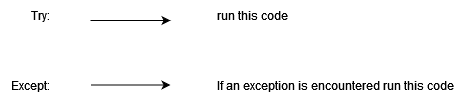
#### However running this code with an external resource is problematic, catching the error **does not** release the resource. 
#### Having the resource not released can lead to very specific hard to debug problems. You can lock someone out of a thread they need by not releasing the lock, you can slow down database and network connections by keeping unused connections open (memory leakage). You can prevent file access by keeping the file open (If there is the policy thay only one process can write to a file, which there should be)
#### For file, network, database and concurrent operations you need to use the keyword finally and explicitely teardown the resource you used
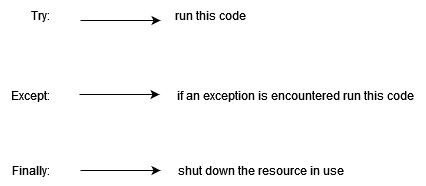

In [124]:
#set-up fase
file = open("hello.txt", 'w')

try:
    file.write('George is a rhino')
except Exception as e: # you might be specific about the exception
    print(f'unfortunately {e} has occured')
finally:# teardown phase
    file.close()

#### Reading is a different CRUD operation than writing and should have it's own context

In [125]:
#set-up fase
file = open("hello.txt", 'r')

try:
    print(file.readline())
except Exception as e: # you might be specific about the exception
    print(f'unfortunately {e} has occured')
finally:# teardown phase
    file.close()

George is a rhino


#### Python introduced the `with` statement to factor out standard use cases of `try... except... finally`
#### `with expression as target:` The with statement creates a context manager object by evaluating the expression after the with statement. 
#### The object that is returned must implement the context manager interface, which exists of two special methods. 
#### The Python compiler calls the `__enter__()` method when it encounters  the `with` keyword and you enter the runtime context this is your explicit set-up phase
#### The compiler calls the `__exit__()` method when the runtime context is exited. This is your specific teardown phase.  

In [126]:
with open('hello.txt', 'w') as file:
    file.writelines(['Purple is a great colour for a rhino',', ',' George is a rhino'])

#### As you can see the file was opened and closed in one statement

In [127]:
file.readline()

ValueError: I/O operation on closed file.

#### You need to reopen the file to read the content

In [129]:
with open('hello.txt', 'r') as file:
    print(file.readlines())

['Purple is a great colour for a rhino,  George is a rhino']


#### You can use multiple expressions after a with statement `with A() as a, B() as b:`

In [130]:
with open('hello.txt', 'w') as f, open('hello2.txt', 'w') as g :
    f.writelines(['Croc', ' is', ' Peckish!'])
    g.write('snackies!!!')

In [131]:
with open('hello.txt', 'r') as f, open('hello2.txt', 'r') as g:
    print(f.readlines()[0])
    print(g.read())

Croc is Peckish!
snackies!!!


#### This idea of using a context manager to define a runtime context is very powerful
#### You can do much more in such a context than grouping a set of operations together. 
#### I can can create abnormal behavior in such a context, and once leaving that context return to the default behaviour. See the code below. 

In [132]:
import sys

class ReversePrint:
    
    def __enter__(self): # 1
        self.original_write = sys.stdout.write # 2
        sys.stdout.write = self.reverse_write # 3
        return 'and George' # 4
    
    def reverse_write(self, text): # 5
        self.original_write(text[::-1]) #6
        
    def __exit__(self, exception_type=None, exception_value=None, traceback=None): #7
        sys.stdout.write = self.original_write # 8
        if exception_type is OSError: # 9
            print(f'an OSError has occured with as value {exception_value}')
            return True #10
        
        

In [133]:
with ReversePrint() as wtf:
    print('Ente, Rhino, Croc')
    print(wtf)

corC ,onihR ,etnE
egroeG dna


In [134]:
wtf

'and George'

#### What have we done in ReversePrint?
#### We have taken a regular print statement and reversed the print order, but only within the context of the code block starting with the with keyword
#### Let's look at it point for point
#### 1 Python invokes the special method `__enter__()`
#### 2 we caputure the actually sys.stdout.write (which is a method and as argument has text) and safe it so we can restore it later.
#### 3 we monky patch sys.stdout.write with our own method. https://stackoverflow.com/questions/5626193/what-is-monkey-patching 
#### 4 We have named a target variable `wtf` with the as keyword, returning this gives `wtf` a value, namely 'and George'
#### 5 our replacement to sys.stdout.write reverse the text argument
#### 6 and calls the original implementation. Remember sys.stdout.write is method with as argument text
#### 7 Python calls the special method `__exit__()` with None, None, None It knows to do this because we have executed reverse_write
#### 8 we set the original value of sys.stdout.write back
#### 9 If there was an error to propogate it gets handled now
#### 10 returns True so the interpreter knows the error was caught.
#### When the context we have just created runs in runtime, every call to print('text') will print that text reseverd. If there are no more calls to print, control is given back to the regular runtime. 
#### The creation of a context where I can determine the suite of actions that execute is indeed a very powerful idea.

## **contextlib**
#### Python has a library with all kinds useful utility functions for context managers.
#### check it outhttps://docs.python.org/3/library/contextlib.html
#### one of them is the decorator `@contextmanager`
#### We can use the decorator to rewrite ReversePrint this time not as an expensive class, but as a cheap function (why is a function cheap and a class not?)

In [135]:
from contextlib import contextmanager
import sys

@contextmanager
def reverse_printer():
    original_write = sys.stdout.write
    
    def reverse_write(text): 
        original_write(text[::-1]) 
    
    sys.stdout.write = reverse_write
    yield 'and George' #
    sys.stdout.write = original_write  

In [136]:
with reverse_printer() as wtf:
    print('Ente, Rhino, Croc')
    print(wtf)

corC ,onihR ,etnE
egroeG dna


#### Using a generator has a specific effect in use with the @contextmanager
#### Everything before the yield will be executed at the beginning of the block when the interpreter calls `__enter__()`
#### Everything after the yield will run when `__exit__()` is called. 
#### There is however a flaw in this code. I don't expect you to see it but if there is an exception in this code the Python interpreter will propogate that to to the yield expression
#### We should fix this

In [137]:
from contextlib import contextmanager
import sys

@contextmanager
def reverse_printer():
    original_write = sys.stdout.write
    
    def reverse_write(text): 
        original_write(text[::-1]) 
    
    sys.stdout.write = reverse_write
    msg = ''
    try:
        yield 'and George' 
    except Exception as e:
        msg = f'unfortunately {e}'
    finally:
        sys.stdout.write = original_write
        if msg: print(msg)

In [138]:
with reverse_printer() as wtf:
    print('Ente, Rhino, Croc')
    print(wtf)

corC ,onihR ,etnE
egroeG dna


In [139]:
with reverse_printer() as wtf:
    print(zz)
    print(wtf)

unfortunately name 'zz' is not defined


#### You could use the `@contextmanager` to create a context where you deviate from existing behaviour. 
#### For instance if you want to a terribly exact calculation where usually a standard will suffice
#### For exact calculations can you use the decimal library https://docs.python.org/3/library/decimal.html which as a context manager localcontext

In [140]:
from decimal import Decimal, localcontext

with localcontext() as precise:
    precise.prec = 42
    print(Decimal('1') / Decimal('3'))

0.333333333333333333333333333333333333333333


#### Or maybe you need that not so precise in a context as Decimal's standard precision is already 28 digits after the point

In [141]:
from decimal import Decimal, localcontext

with localcontext() as approx:
    approx.prec = 3
    print(Decimal('1') / Decimal('3'))

0.333


#### As you can see it is very useful to have the ability to temporary deviate from the usual
#### Without you having to explictely revert back to the normal as the contextmanager will take care of that for you

#### `@contextmanager` has many elegant ways of solving a problem. 
#### Martijn Pieters wrote an elegant example for the problem of rewriting a file in place using the `@contextmanager` see https://www.zopatista.com/python/2013/11/26/inplace-file-rewriting/
#### As last remark about context managers, a lot of external libraries implement the context manager interface.

## **Else**
#### I guess you know this but you can use the `else` statement outside an `if/else`.
#### You can use it in a `for/else`
#### You should realise this else statement will only run if the loop runs to completion. You can't use break. 

In [142]:
snackies = ['Blue Heron','Cote du Boeuf','Wallaby']

for snack in snackies:
    print(f'Croc loves {snack}')
else:
    print('I am peckish')

Croc loves Blue Heron
Croc loves Cote du Boeuf
Croc loves Wallaby
I am peckish


####  Of course as you know a for loop is syntactic sugar for a while loop, you can see the `while/else`straight away.

In [143]:
n = 0 

while n < len(snackies):
    print(f'Croc loves {snackies[n]}')
    n += 1
else:
    print('I am still peckish!')

Croc loves Blue Heron
Croc loves Cote du Boeuf
Croc loves Wallaby
I am still peckish!


#### As I already showed you Try/ Except is used quite a lot for control flow in Python.
#### Python programs in Easier to ask for forgiveness than permission see https://docs.python.org/3/glossary.html#term-eafp So Python states this is clean code...
#### However there is room to improve on these type of `try/except` blocks because just catching an exception is usually not enough to let program continued in a good state. You want to be more explicit.

In [144]:
def danger(n):
    if n != 1:
        raise Exception('This is very dangerous')
    else:
        print('Purple is the best colour')

def after():
    return 'Ente is very dangerous, Croc is sweety'

def log(e:Exception)->None:
    f = open('log.txt', 'w')
    f.write(str(e))


try:
    danger(0)
except Exception as e:
    log(e)
    
after()

         

'Ente is very dangerous, Croc is sweety'

#### In the above code I will continue even if exception happened
#### In the below code I will only go to `after()` if there is no exception

In [146]:
try:
    danger(0)
except Exception as e:
    log(e)
else:
    after()

f = open('log.txt', 'r')
f.readline()

'This is very dangerous'

## **Finally**
#### Bringing structure to your code is extremely important
#### Not only will it make your code much more readable, it will have greater logic and contains less mistakes, the mistakes that occur are easier to track and therefore to debug.
#### Knowing these concepts will make your code structured.
## **The end**